In [ ]:
from fastai.vision import *
import warnings
warnings.filterwarnings("ignore")


In [ ]:
path = Path('/content/drive/My Drive/Colab Notebooks/veggies/Train')

In [ ]:
for folder in ('onions','potatoes','tomatoes','carrots'):
  print(folder)
  verify_images(path/'Train'/folder, delete=True,max_size=500)
  verify_images(path/'Valid'/folder, delete=True,max_size=500)
  

onions
potatoes
tomatoes
carrots


In [ ]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train='.',valid_pct=0.2,
                                  ds_tfms=get_transforms(),size=224,num_workers=4).normalize(imagenet_stats)

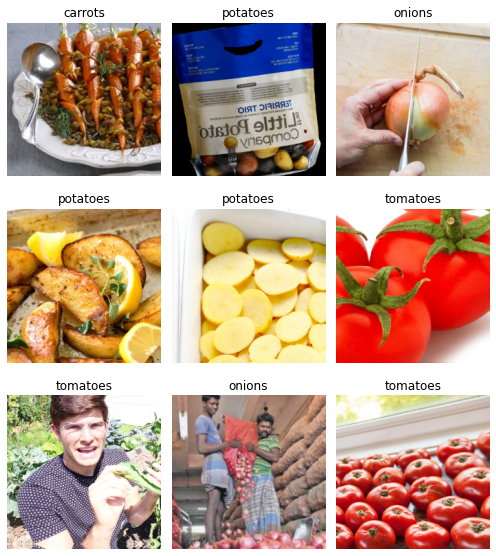

In [ ]:
data.show_batch(rows=3,figsize=(7,8))

In [ ]:
from fastai.metrics import error_rate
learn = create_cnn(data,models.resnet34,metrics=error_rate)

In [ ]:
defaults.device = torch.device('cuda')
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.346523,0.472057,0.129841,01:09
1,0.827680,0.461154,0.134396,01:08
2,0.602424,0.381944,0.129841,01:09
3,0.465322,0.363039,0.120729,01:08


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


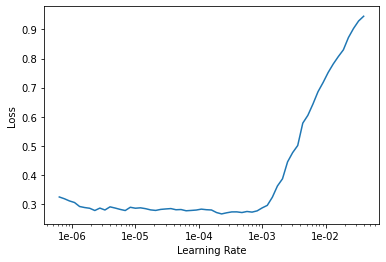

In [ ]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(4, max_lr=slice(3e-5, 3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.310503,0.370167,0.109339,01:08
1,0.257326,0.329823,0.086560,01:08
2,0.186892,0.309774,0.084282,01:09
3,0.139711,0.309506,0.082005,01:09


In [ ]:
learn.save('/content/drive/My Drive/Colab Notebooks/veggies/food-detection-stage-1')

In [ ]:
import os


In [ ]:
os.getcwd()

'/content'

In [ ]:
from fastai.widgets import *

ds, idxs = DatasetFormatter().from_toplosses(learn)
ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [ ]:
print(data.classes, data.c, len(data.train_ds), len(data.valid_ds))


['carrots', 'onions', 'potatoes', 'tomatoes'] 4 1760 439


In [ ]:
interp = ClassificationInterpretation.from_learner(learn)


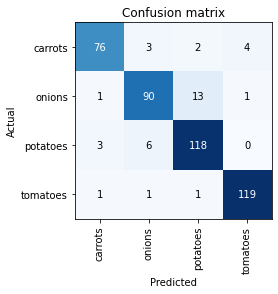

In [ ]:
interp.plot_confusion_matrix()

In [ ]:
interp.plot_top_losses(9, figsize=(15,15))